In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from seaborn import set_style
import statsmodels.tsa.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima.arima.utils import ndiffs
from pmdarima import auto_arima
set_style("whitegrid")

In [2]:
stock_symbols = ['GOOG','MSFT','AMZN','NVDA','AAPL']

In [4]:
df = [pd.read_csv(f'/home/hirak/Desktop/Erdos/SIGNS_2024/stock_data/{symbol}/stock_price.csv') for symbol in stock_symbols]

In [8]:
len(df)

5

In [14]:
df_close = [df[i][["Close"]].copy() for i in range(len(df))]

In [17]:
for i in range(len(df_close)):
    result = adfuller(df_close[i].Close.dropna())
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

ADF statistic: 0.7789685919979568
p-value: 0.9912889838443667
ADF statistic: 1.9139058494760641
p-value: 0.9985500660721444
ADF statistic: 0.01313244457387149
p-value: 0.9596047488905579
ADF statistic: 3.079398028204449
p-value: 1.0
ADF statistic: 1.1115832639899839
p-value: 0.9953142786169403


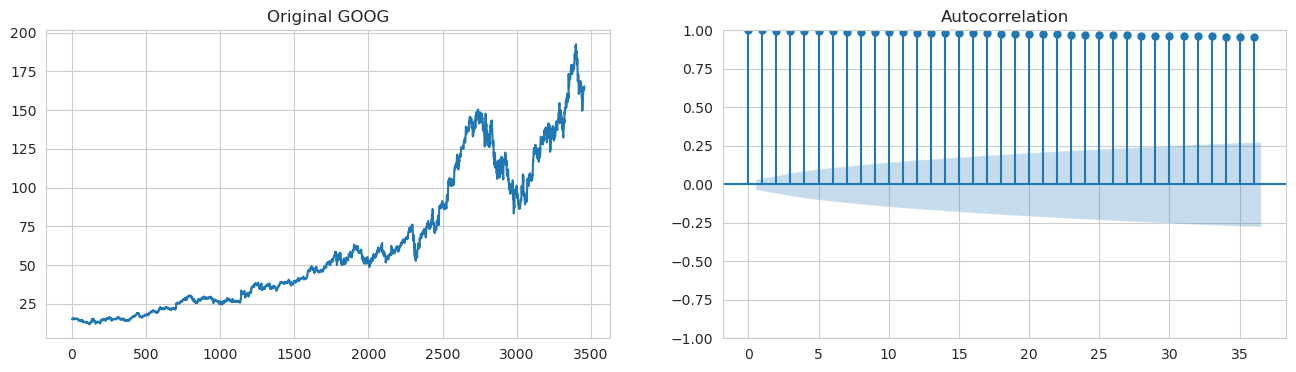

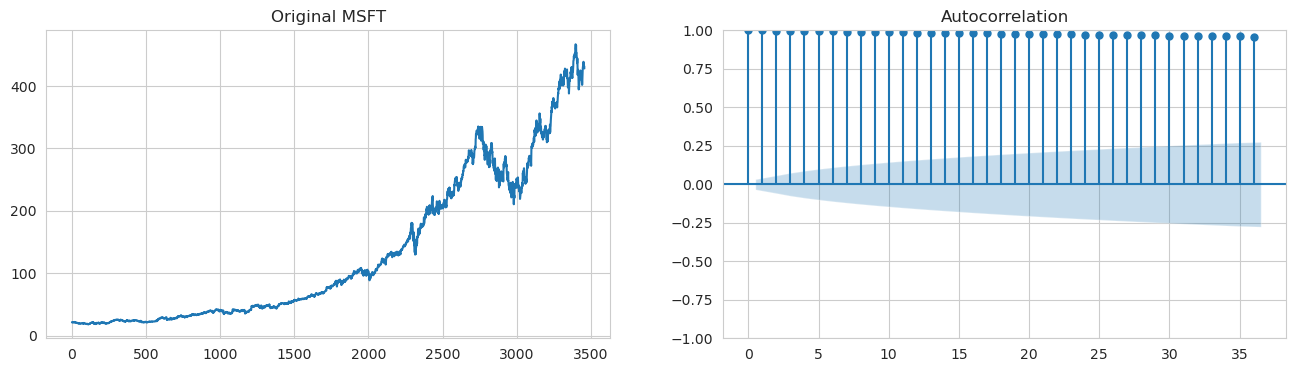

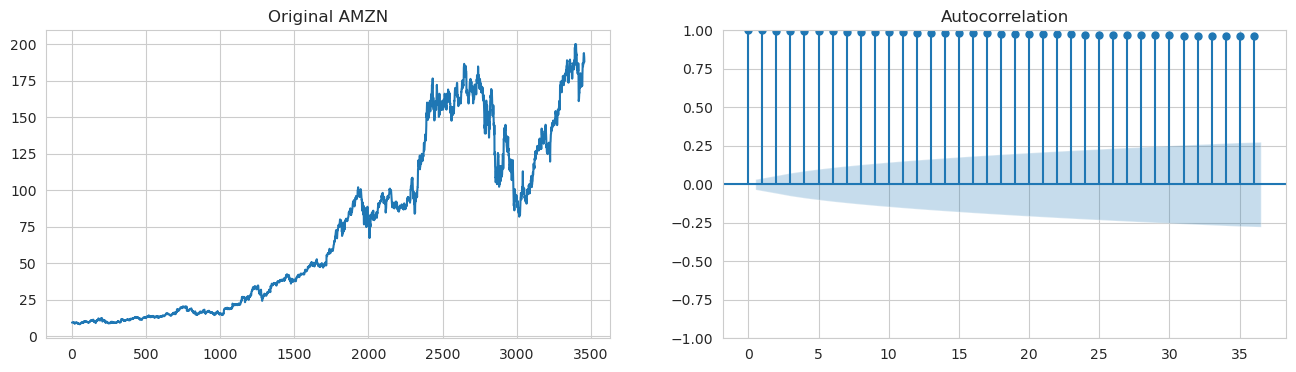

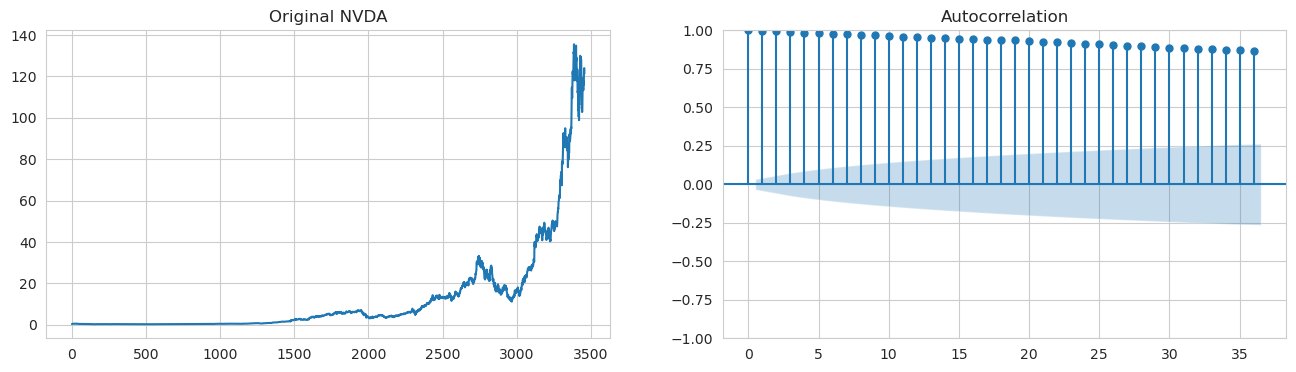

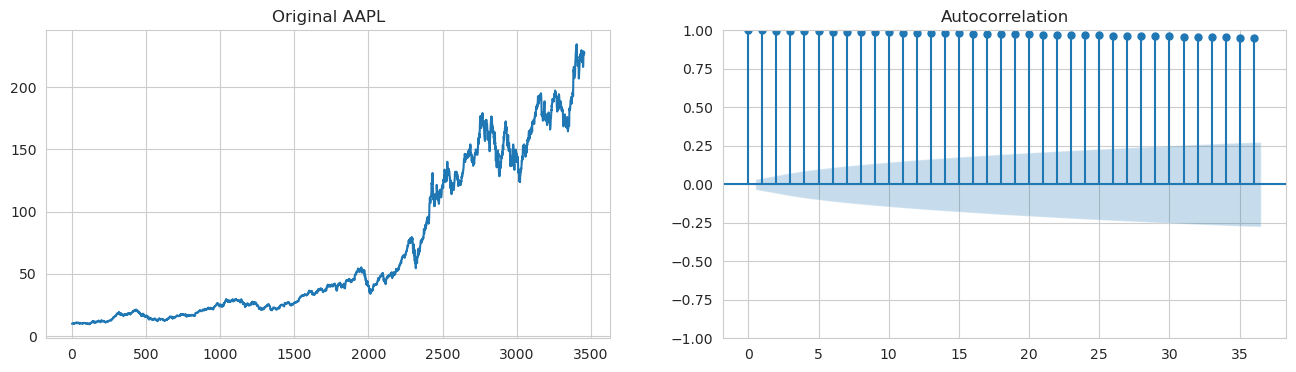

In [21]:
for i in range(len(df_close)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df[i].Close)
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_acf(df[i].Close, ax=ax2);

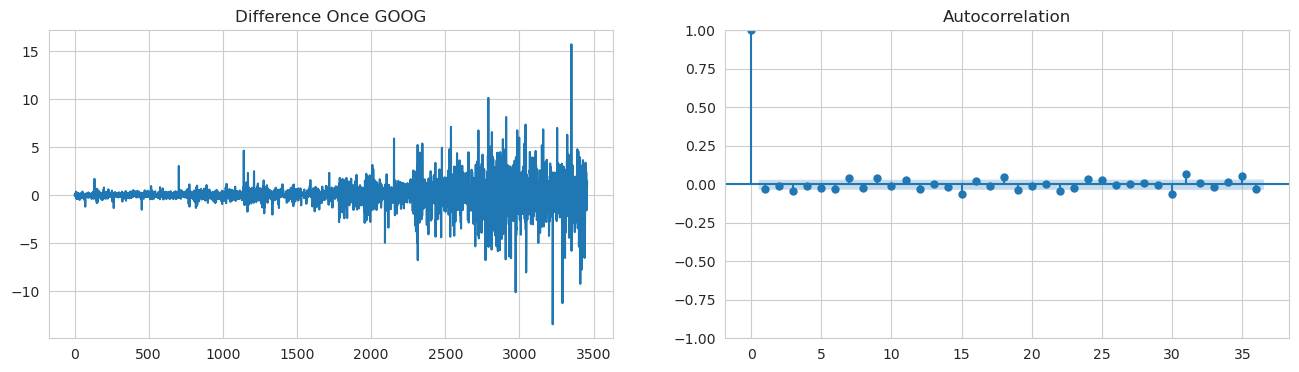

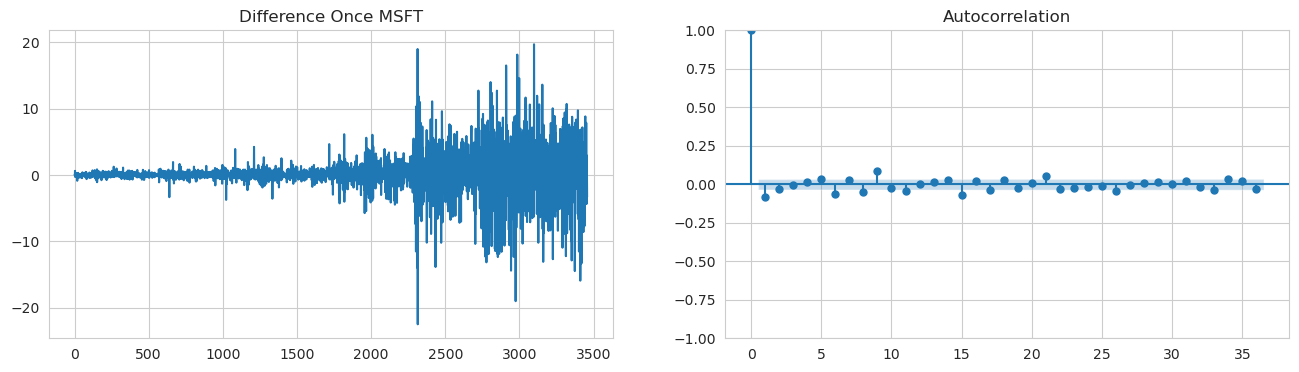

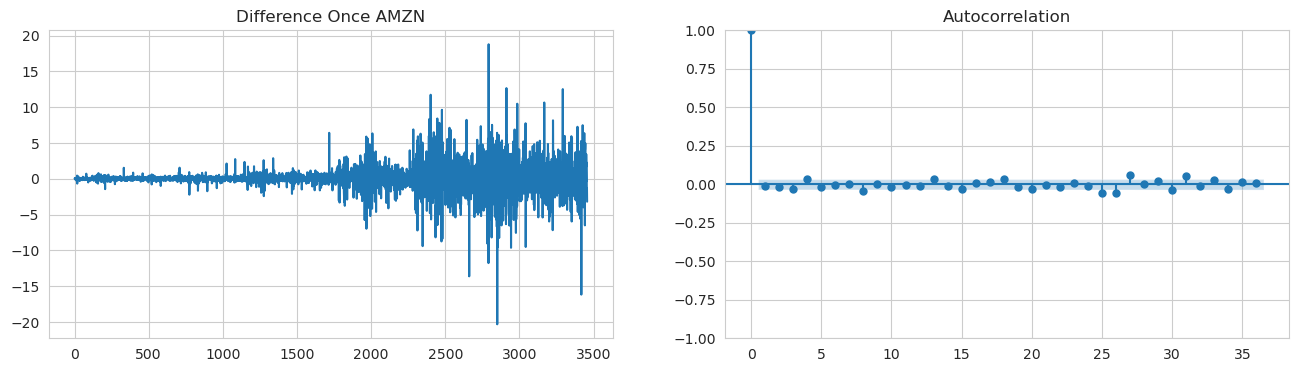

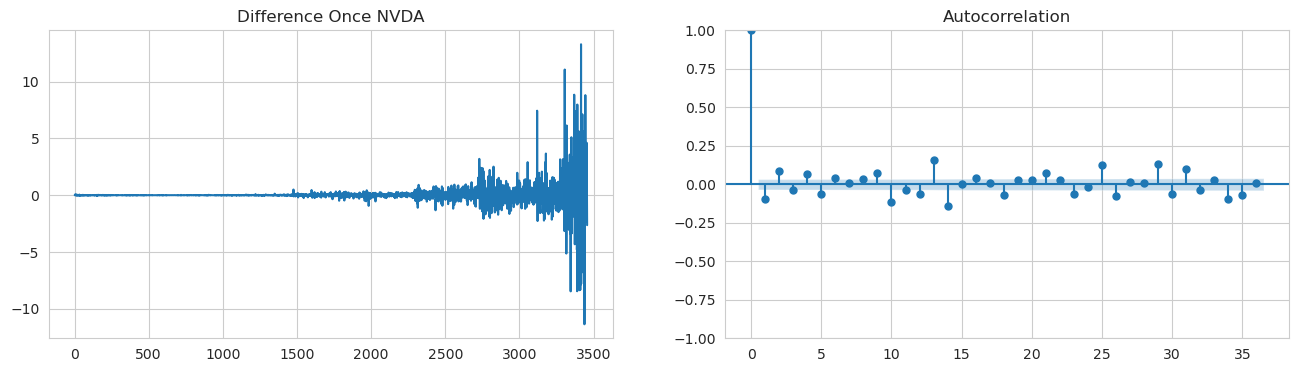

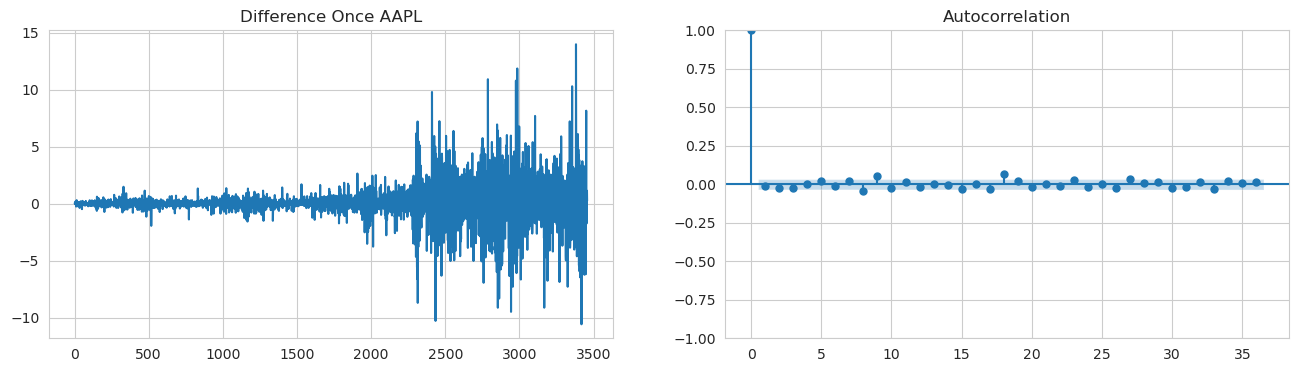

In [22]:
for i in range(len(df_close)):
    diff1 = df[i].Close.diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [24]:
ndif = [ndiffs(df[i].Close, test="adf") for i in range(len(df))]
print("ndif", ndif)

ndif [1, 1, 1, 1, 1]


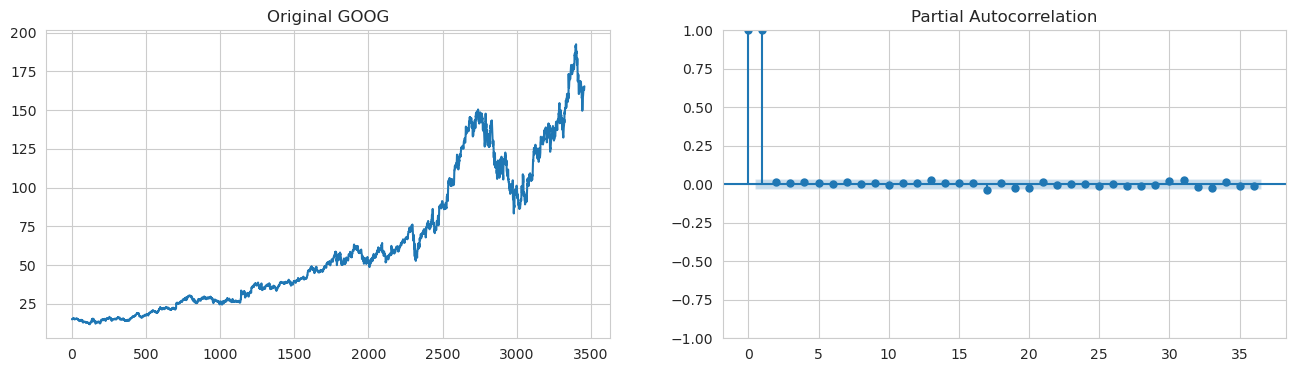

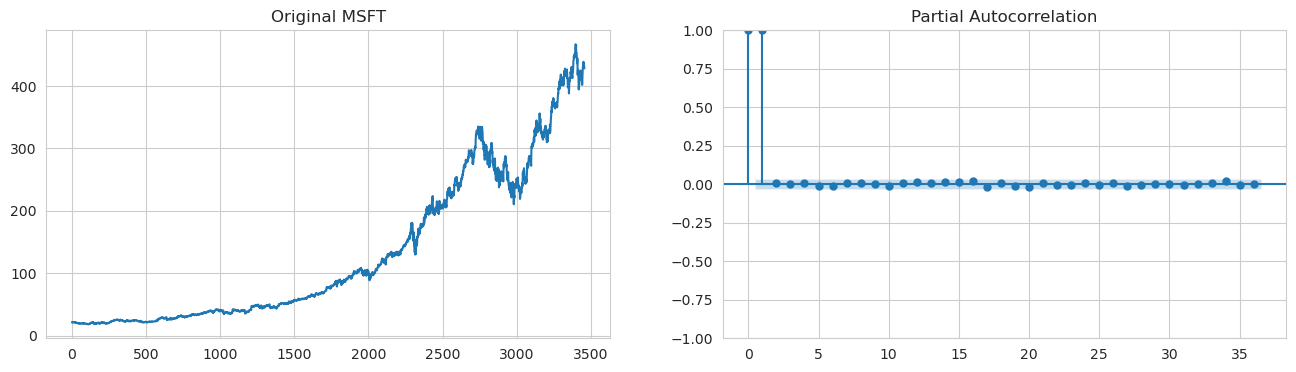

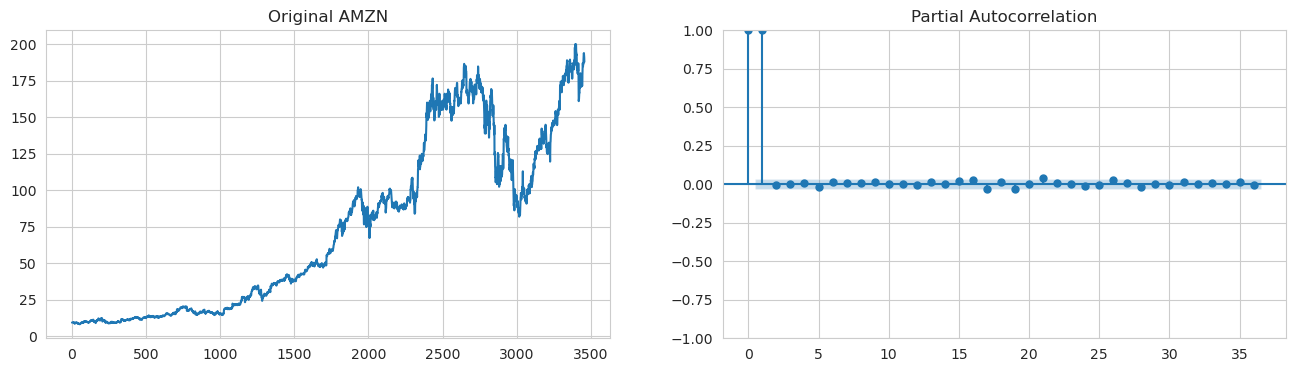

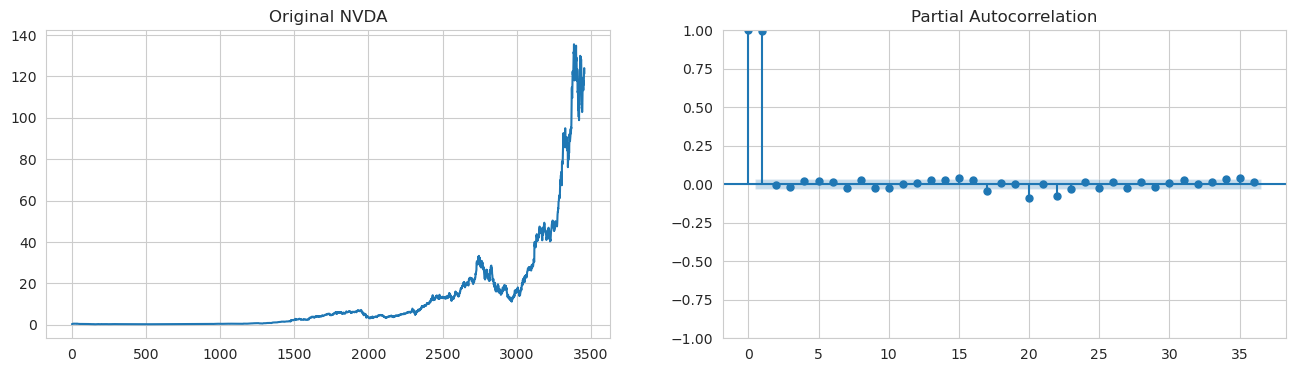

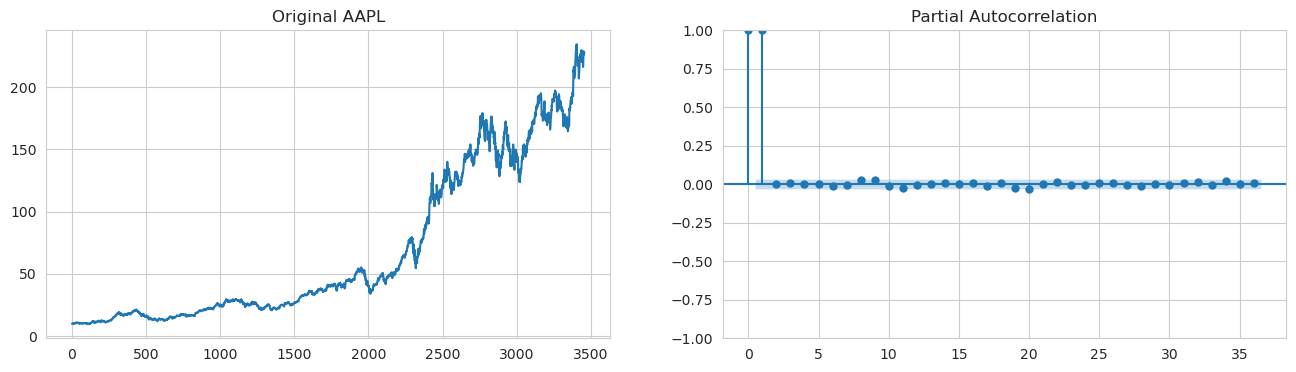

In [25]:
for i in range(len(df_close)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(df[i].Close)
    ax1.set_title(f"Original {stock_symbols[i]}")
    plot_pacf(df[i].Close, ax=ax2);

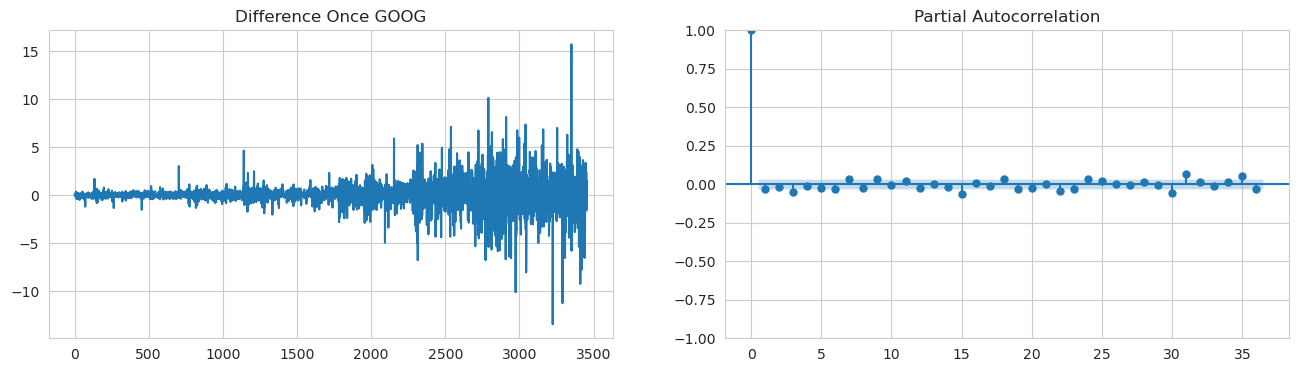

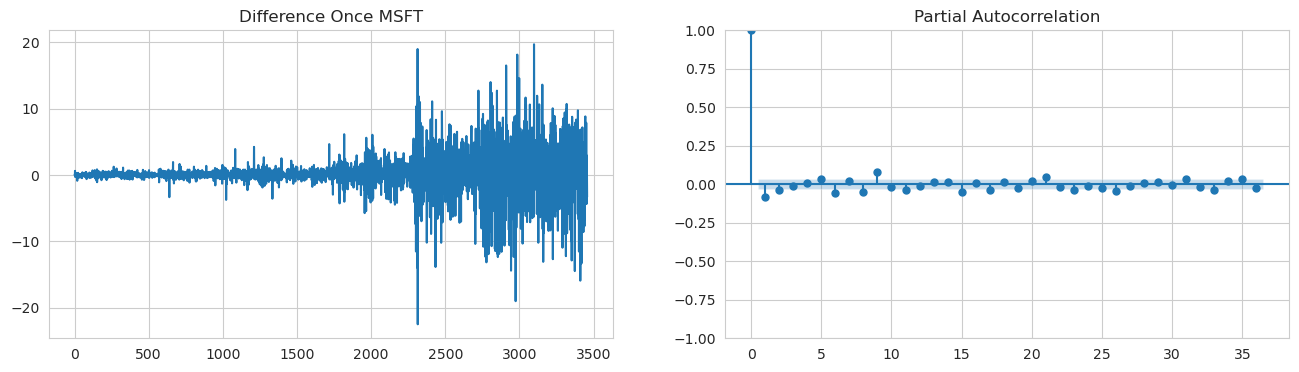

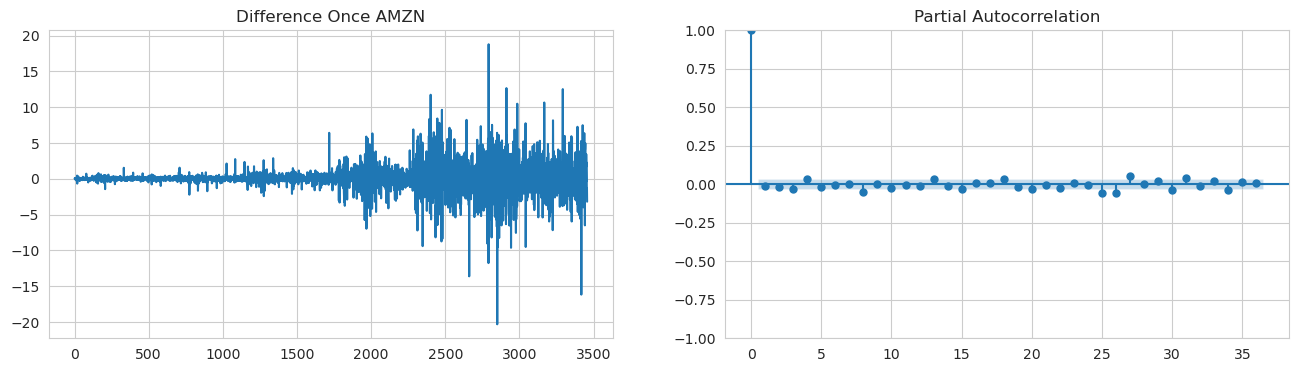

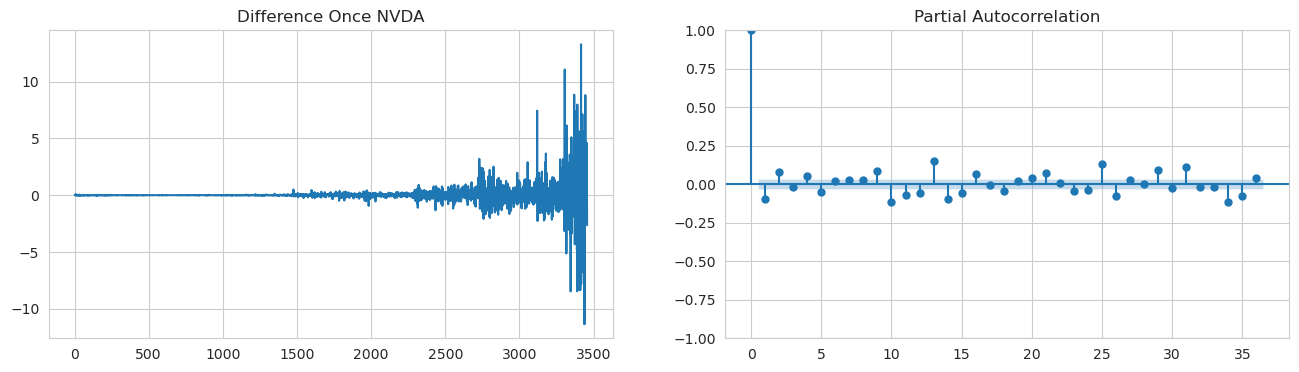

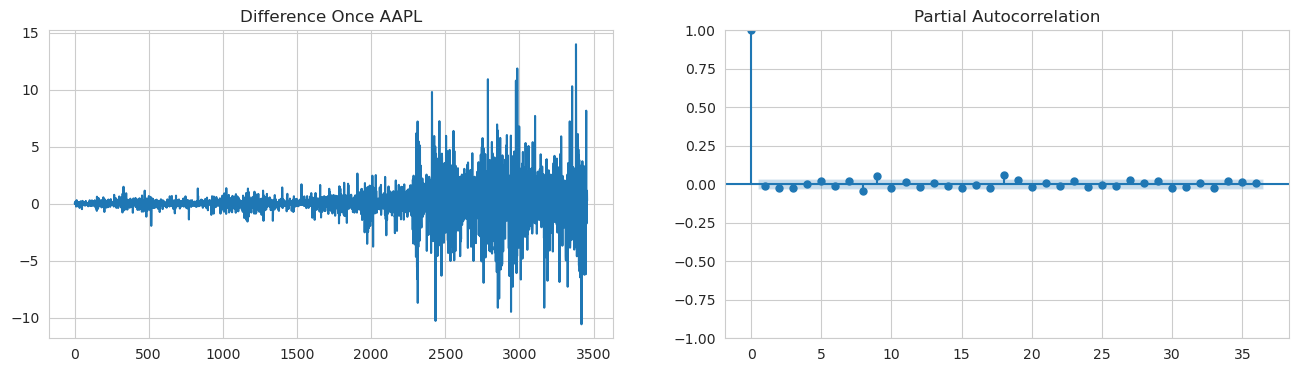

In [30]:
for i in range(len(df_close)):
    diff1 = df[i].Close.diff().dropna()

    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

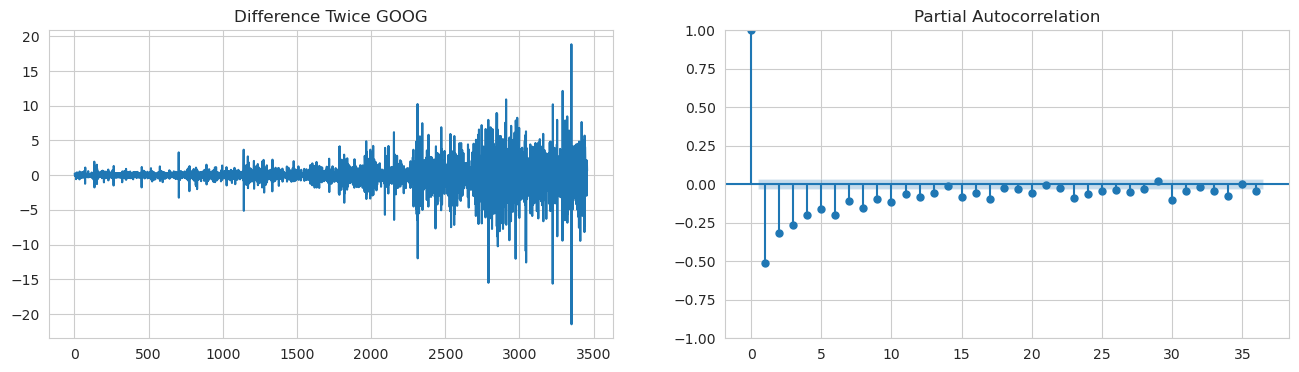

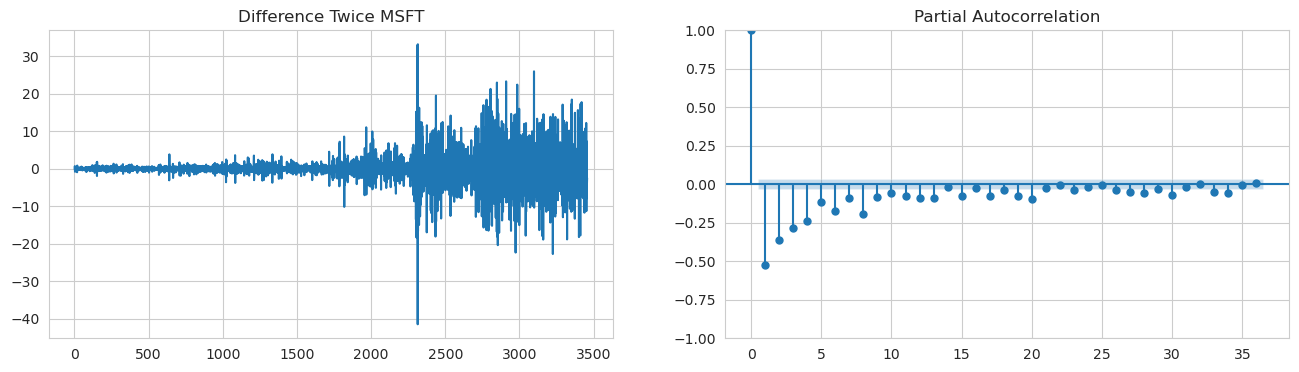

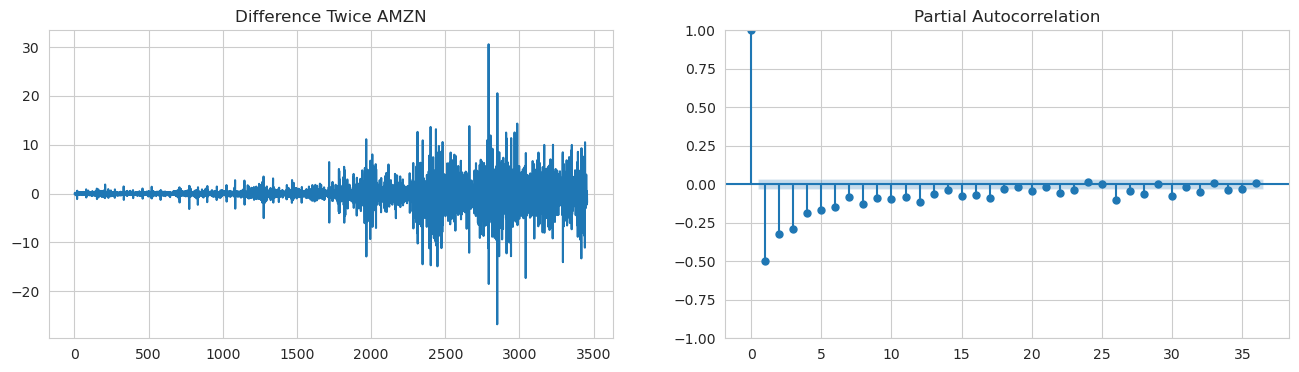

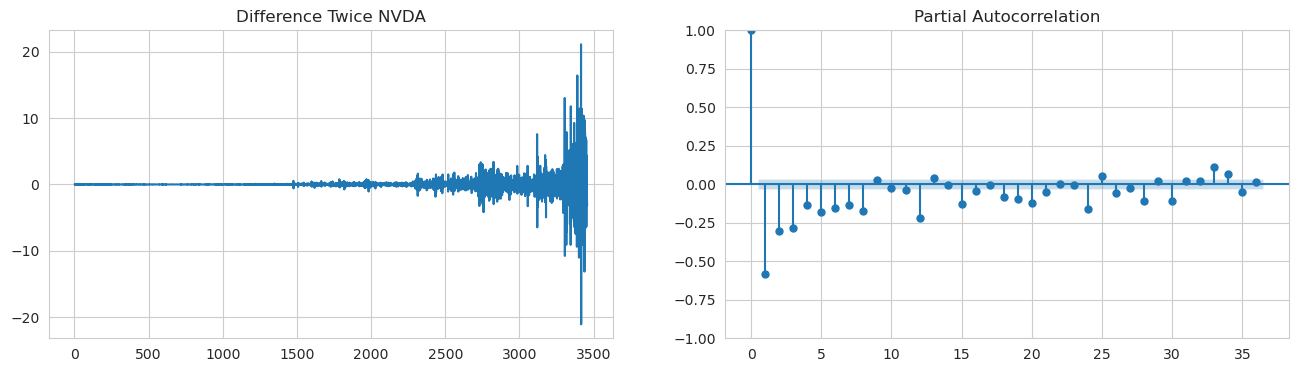

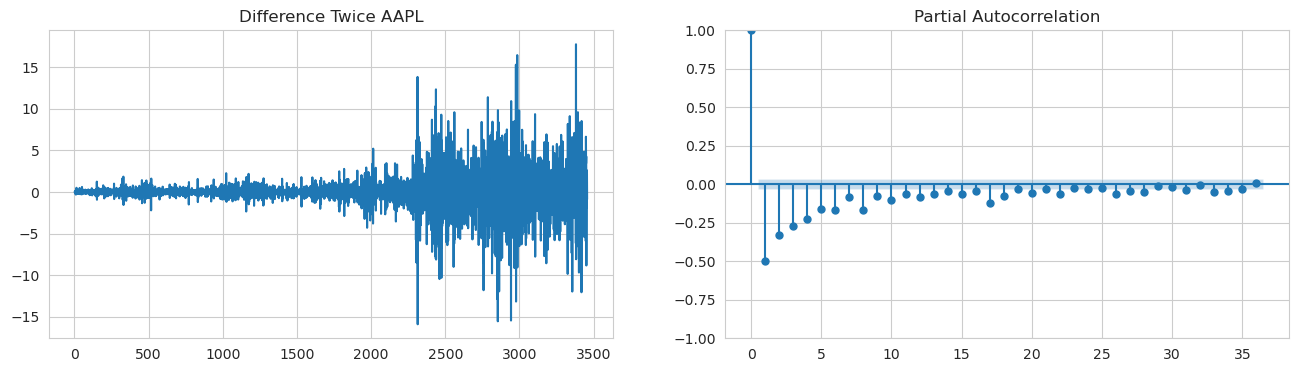

In [29]:
for i in range(len(df_close)):
    diff2 = df[i].Close.diff().diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff2)
    ax1.set_title(f"Difference Twice {stock_symbols[i]}")
    plot_pacf(diff2, ax=ax2);

In [71]:
# orderr = auto_arima(df[0].Close, trace=True).get_params().get("order")
# print(orderr)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12156.413, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12154.912, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12154.797, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12157.727, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12156.168, Time=2.18 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12155.779, Time=0.62 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12150.697, Time=2.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12150.076, Time=2.48 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12149.251, Time=0.81 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=12151.027, Time=0.97 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12149.240, Time=5.65 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12151.053, Time=5.92 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=12151.368, Time=4.06 sec
 ARIMA(0,1,5)(0,0,0)[0] i

In [73]:
arima_order = {}
for i in range(len(df)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_order[i] = auto_arima(df[i].Close, trace=True).get_params().get("order")
    print(f"ARIMA Order for {stock_symbols[i]}: {arima_order[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.89 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12156.413, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12154.912, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12154.797, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12157.727, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12156.168, Time=2.23 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=12155.779, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12150.697, Time=1.99 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12150.076, Time=2.52 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=12149.251, Time=0.82 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=12151.027, Time=1.06 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=12149.240, Time=6.20 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=12151.053, Time=6.39 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=12151.368, Time=4.04 sec
 ARIMA(0

In [75]:
arima_result = {}
for i in range(len(df_close)):
    model = sm.ARIMA(df[i].Close, order=arima_order[i])
    arima_result[i] = model.fit()
    print(f"\n ARIMA Results for {stock_symbols[i]}:\n {arima_result[i].summary()}")


 ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3457
Model:                 ARIMA(1, 1, 4)   Log Likelihood               -6069.695
Date:                Wed, 13 Nov 2024   AIC                          12151.391
Time:                        22:29:25   BIC                          12188.278
Sample:                             0   HQIC                         12164.564
                               - 3457                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9536      0.025    -37.670      0.000      -1.003      -0.904
ma.L1          0.9223      0.026     36.005      0.000       0.872       0.972
ma.L2         -0.0490    

In [76]:
# result.forecast(10)
# residuals = pd.DataFrame(result.resid)

In [78]:
# fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
# ax1.plot(pd.DataFrame(result.resid))
# ax2.hist(pd.DataFrame(result.resid), density=True)


 ARIMA Residuals for GOOG:


 ARIMA Residuals for MSFT:


 ARIMA Residuals for AMZN:


 ARIMA Residuals for NVDA:


 ARIMA Residuals for AAPL:



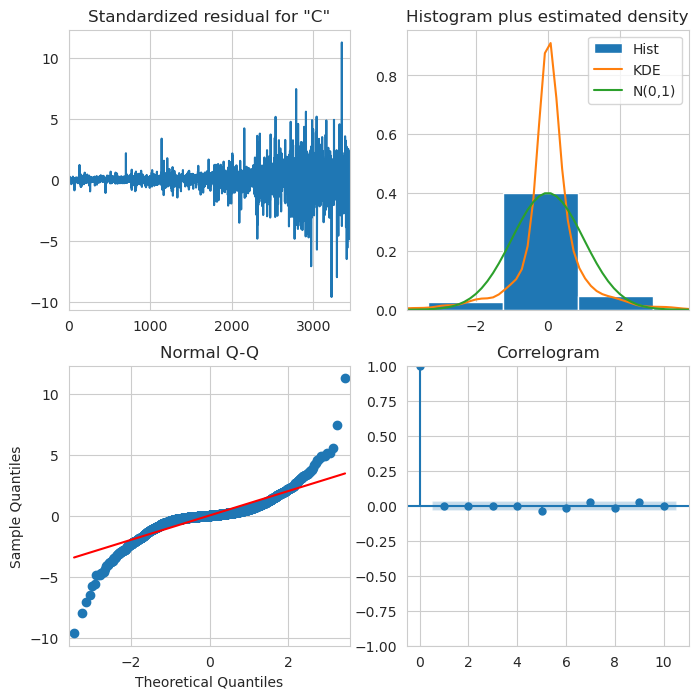

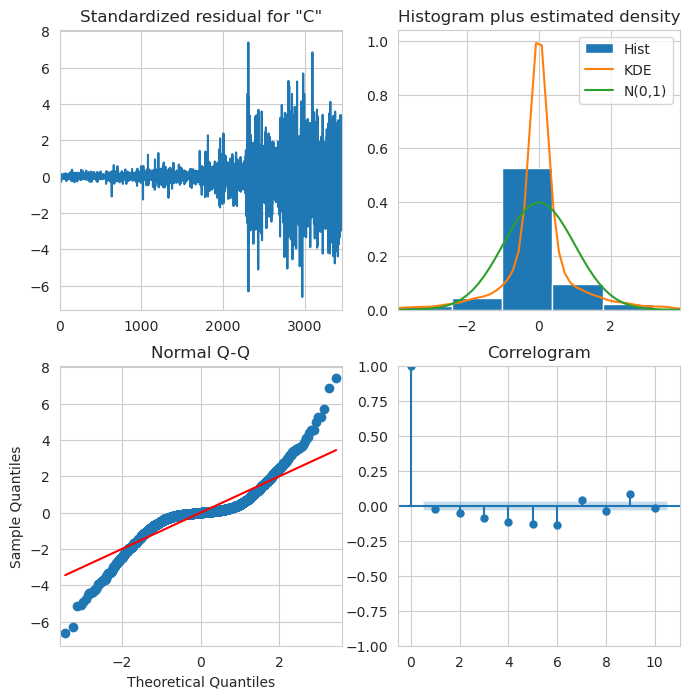

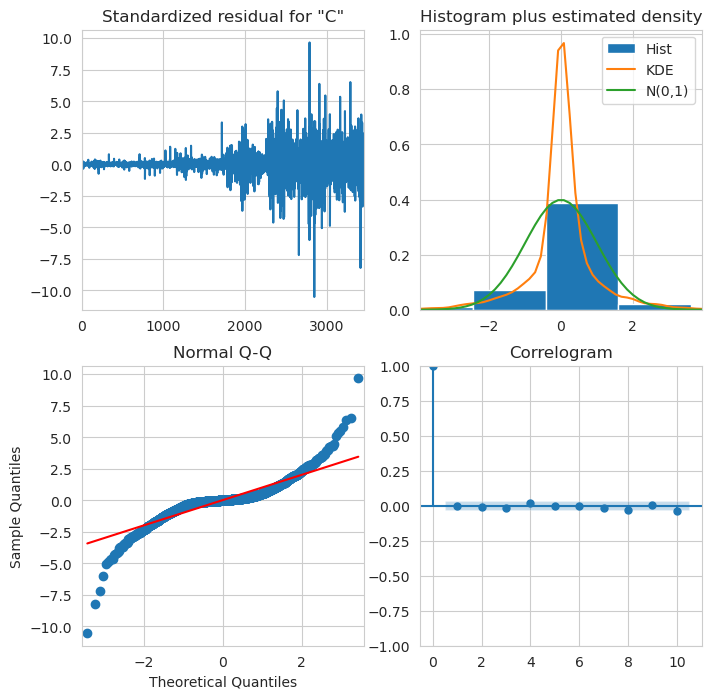

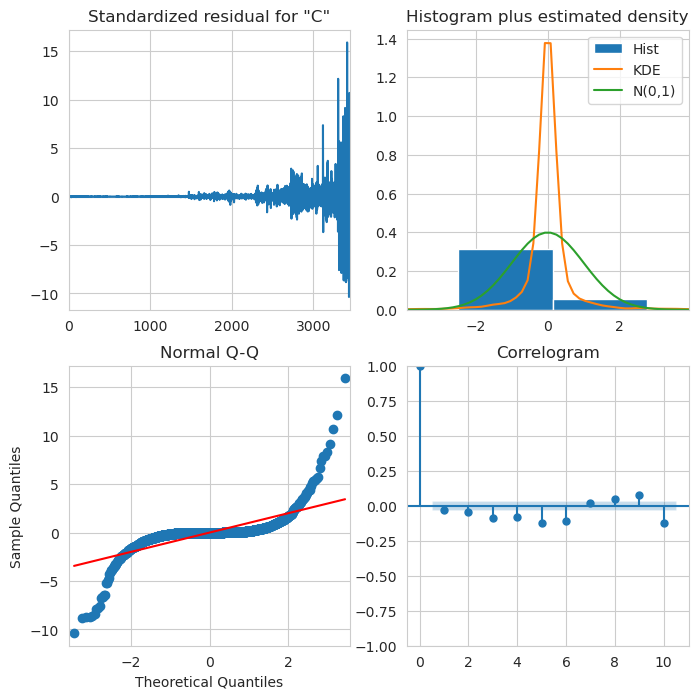

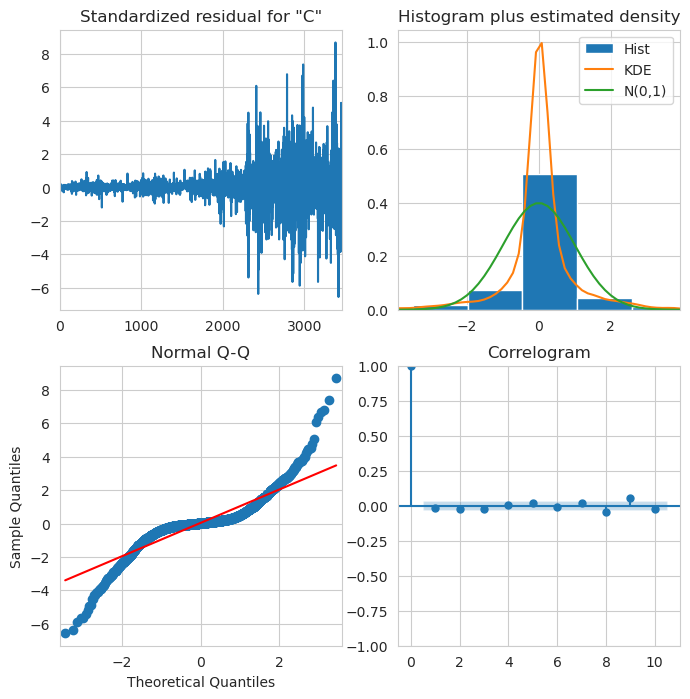

In [81]:
for i in range(len(df_close)):
    arima_result[i].plot_diagnostics(figsize = (8,8))
    print(f"\n ARIMA Residuals for {stock_symbols[i]}:\n")



 Last 100 days stock Closing price for GOOG


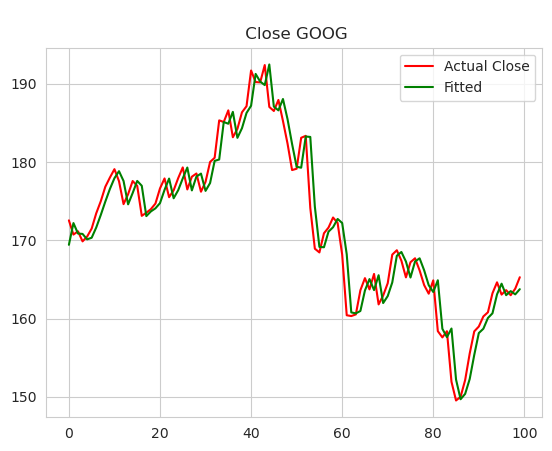


 Last 100 days stock Closing price for MSFT


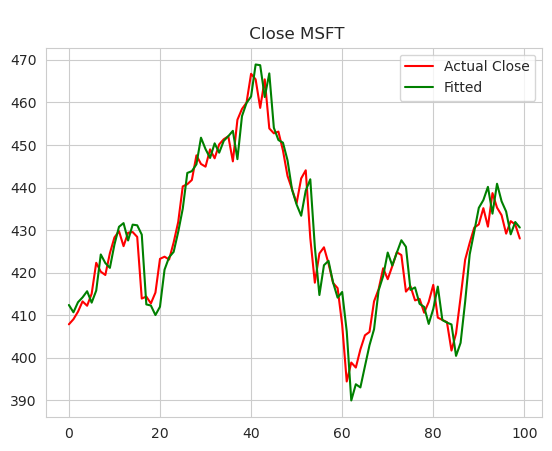


 Last 100 days stock Closing price for AMZN


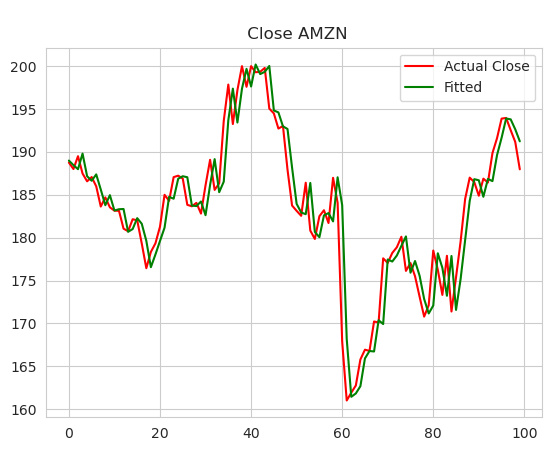


 Last 100 days stock Closing price for NVDA


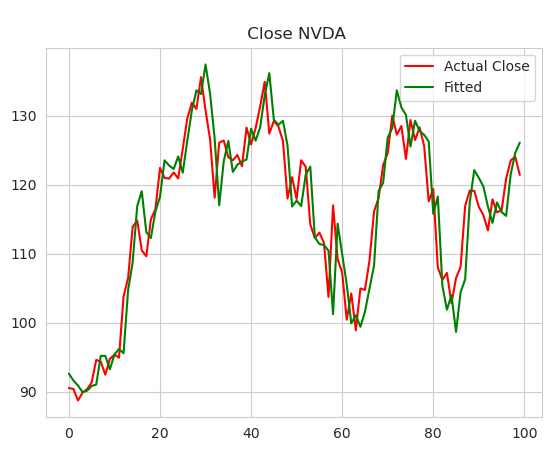


 Last 100 days stock Closing price for AAPL


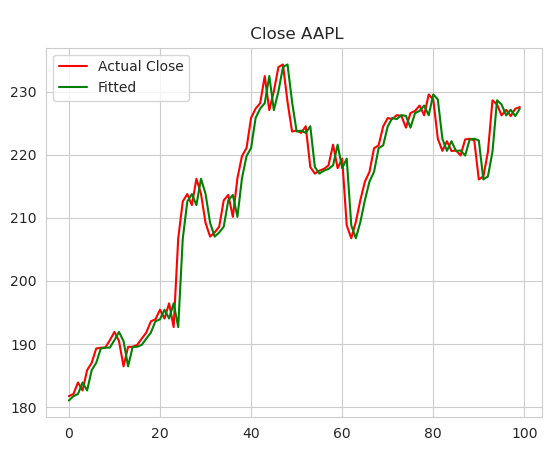

In [85]:
for i in range(len(df_close)):
    print(f"\n Last 100 days stock Closing price for {stock_symbols[i]}")
    plt.plot(range(100), df[i].Close[(len(df[i])-100):], color='r', label='Actual Close')
    plt.plot(range(100), arima_result[i].fittedvalues[(len(df[i])-100):], color='g', label='Fitted')
    plt.legend()
    plt.title(f"\n Close {stock_symbols[i]}")
    plt.show()

In [86]:
train = {}
test = {}
df_train = [df[i][["Close"]].copy() for i in range(len(df))]
for i in range(len(df_close)):
    n = 0
    n = int(len(df[i])*0.95)
    train[i] = df_train[i][:n]
    test[i] = df_train[i][n:]
    print(len(train[i]), len(test[i]))

3284 173
3284 173
3284 173
3284 173
3284 173


In [89]:
for i in range(len(df_close)):
    result = adfuller(train[i].Close.dropna())
    print(f"For {stock_symbols[i]}")
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')

For GOOG
ADF statistic: 0.8057692219906695
p-value: 0.9917287256210615
For MSFT
ADF statistic: 1.9674795933945943
p-value: 0.9986291745790218
For AMZN
ADF statistic: -0.4188681163062788
p-value: 0.9069004931779543
For NVDA
ADF statistic: 3.248264846279832
p-value: 1.0
For AAPL
ADF statistic: 0.8248016524198261
p-value: 0.99202614624519


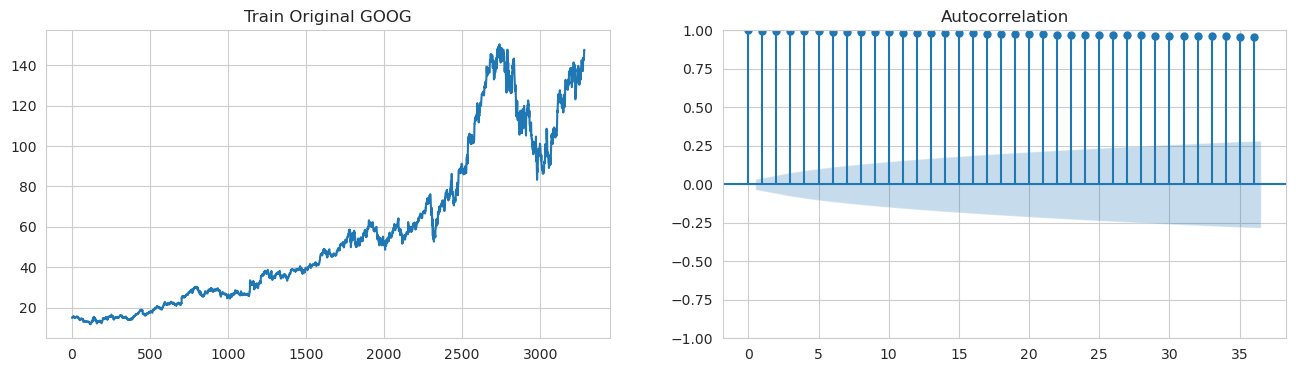

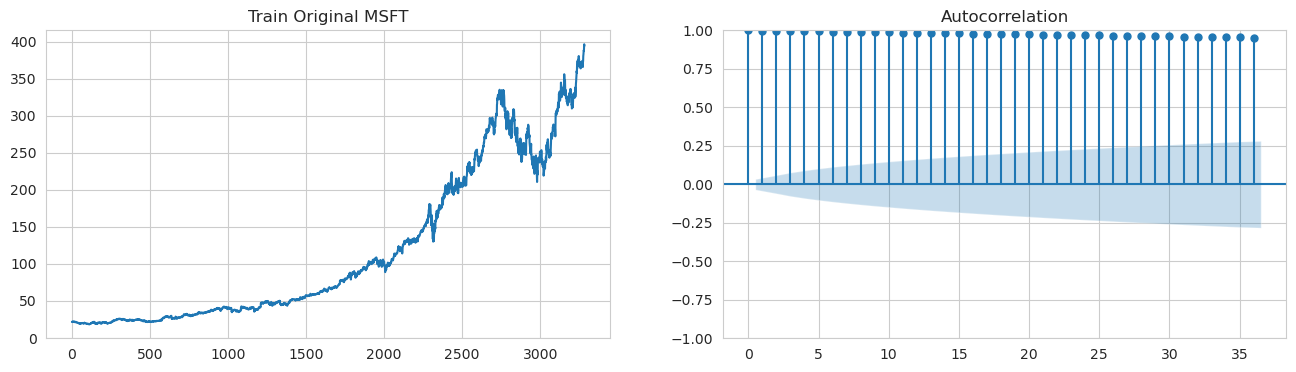

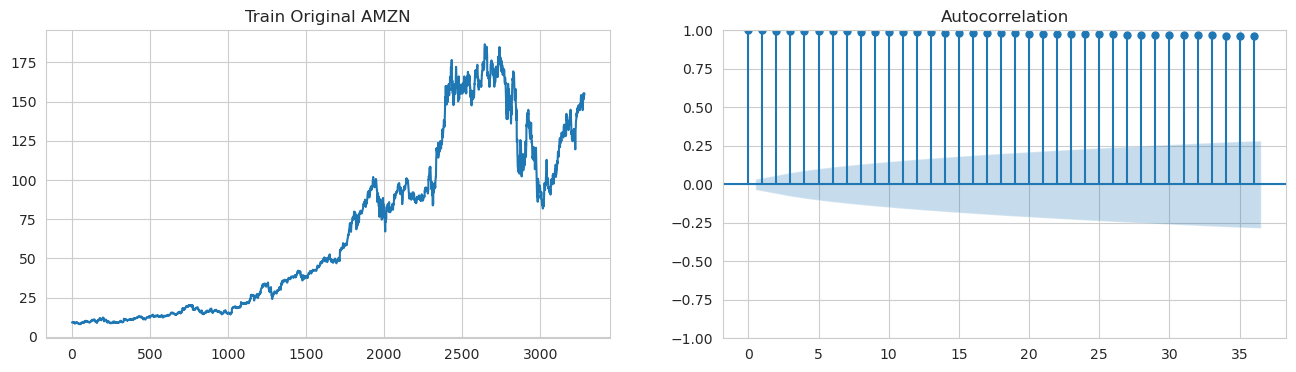

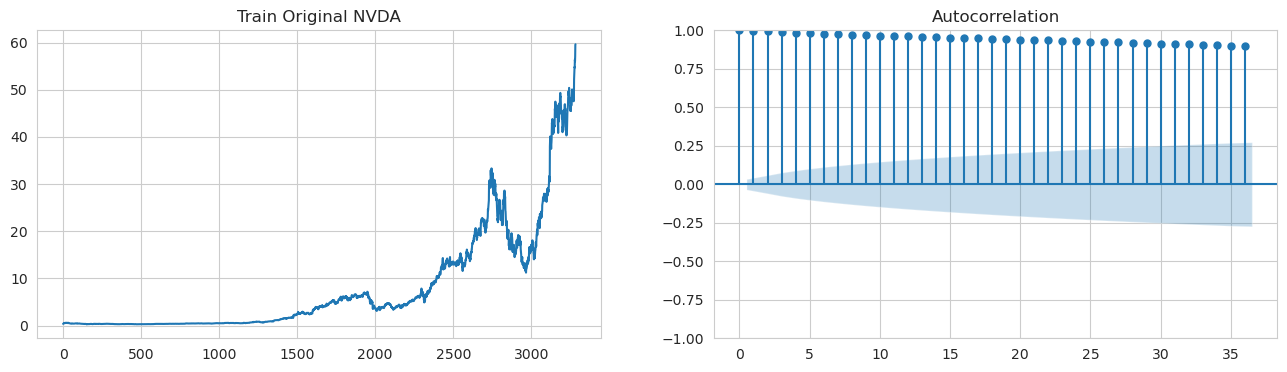

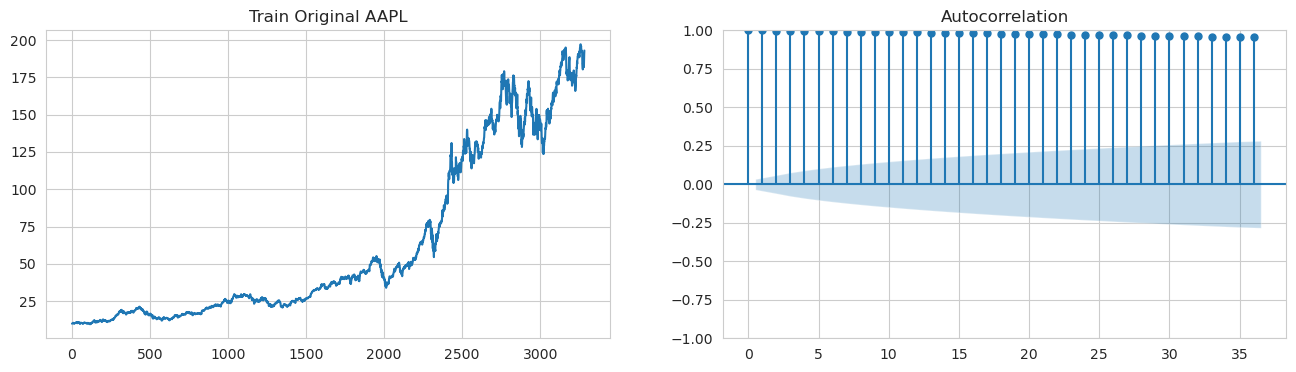

In [90]:
for i in range(len(df_close)):
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(train[i].Close)
    ax1.set_title(f"Train Original {stock_symbols[i]}")
    plot_acf(train[i].Close, ax=ax2);

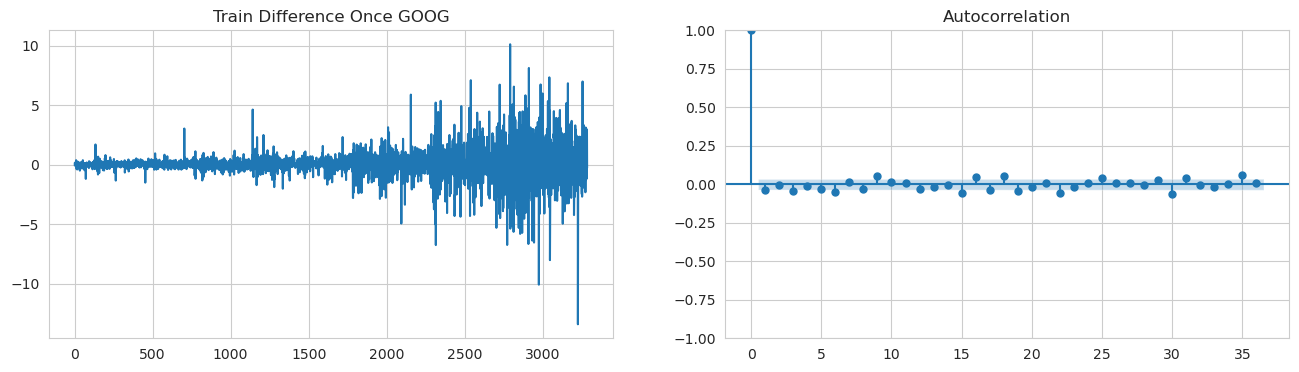

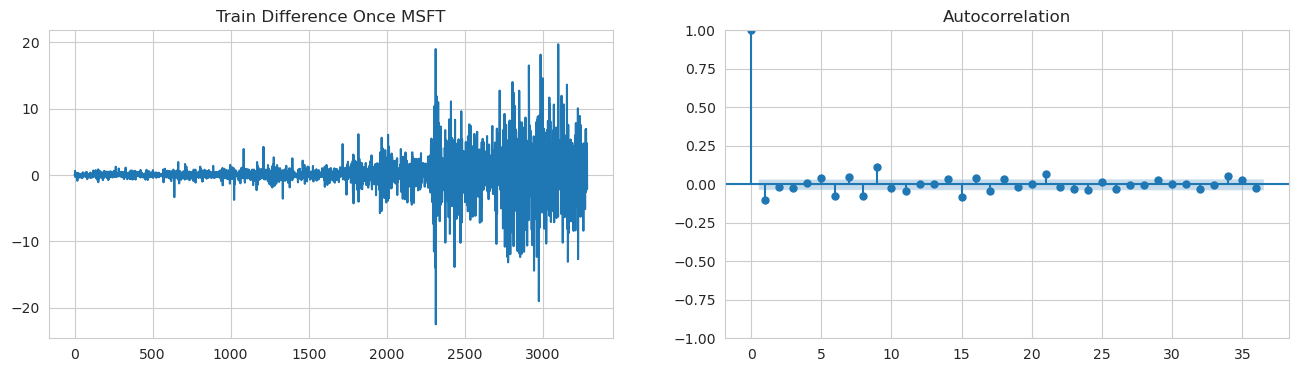

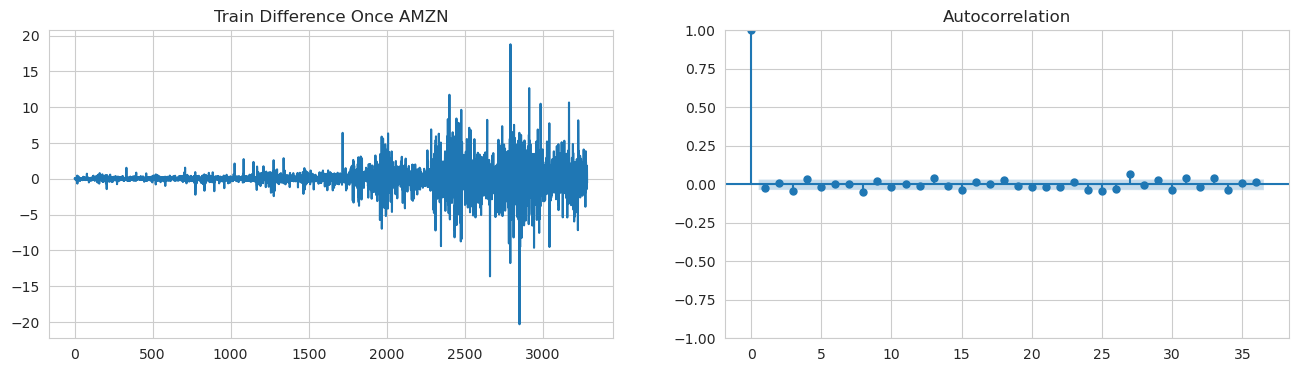

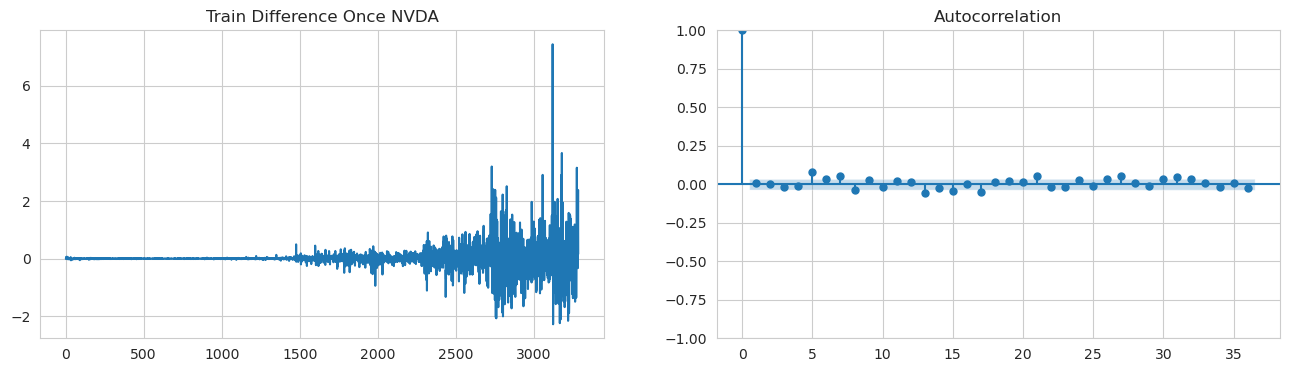

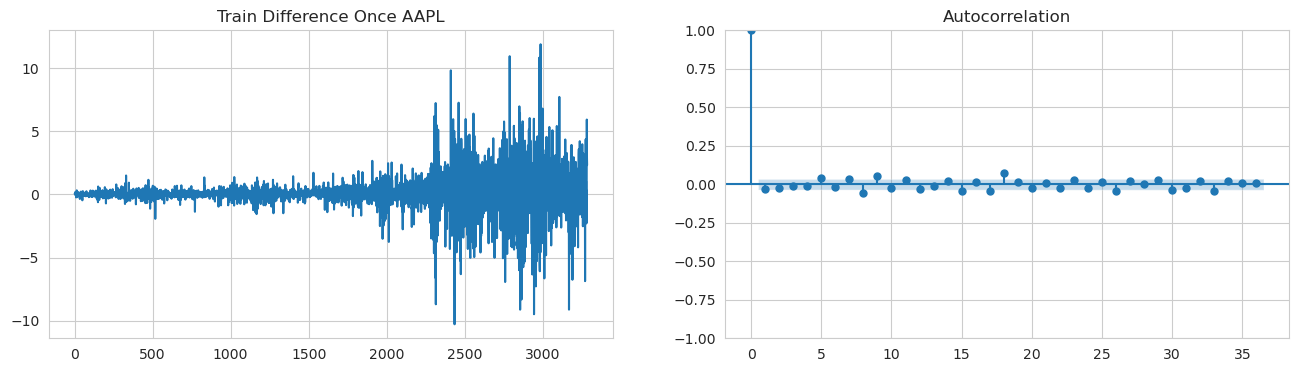

In [91]:
for i in range(len(df_close)):
    diff1 = train[i].Close.diff().dropna()
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_acf(diff1, ax=ax2);

In [92]:
ndif_train = [ndiffs(train[i].Close, test="adf") for i in range(len(df))]
print("ndif_train", ndif_train)

ndif_train [1, 1, 1, 1, 1]


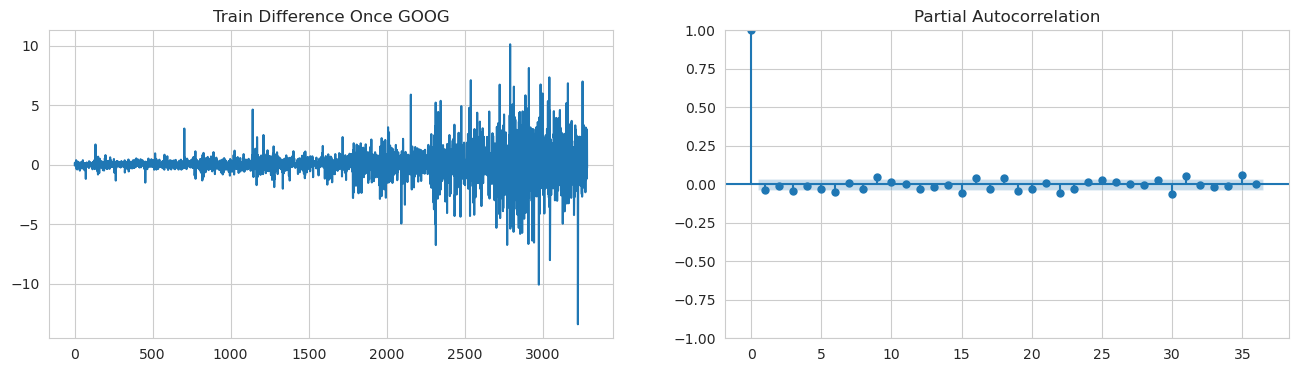

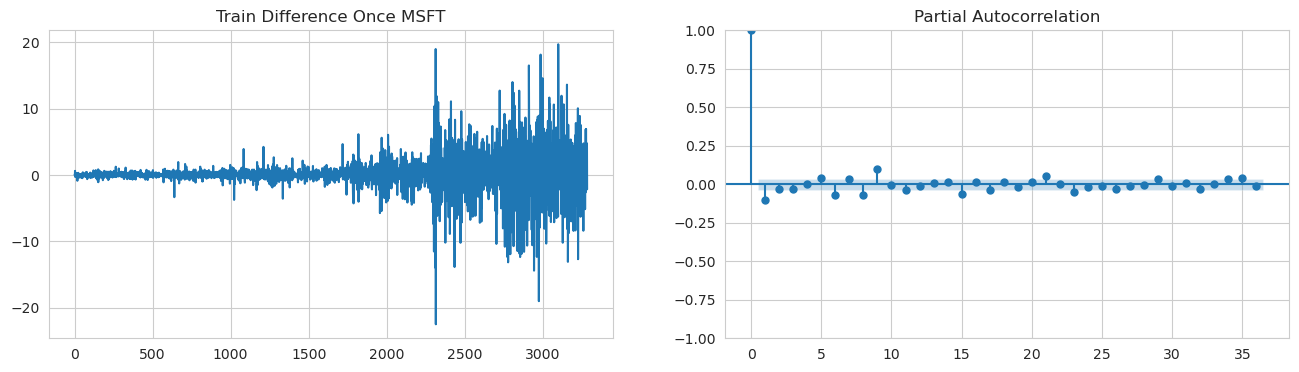

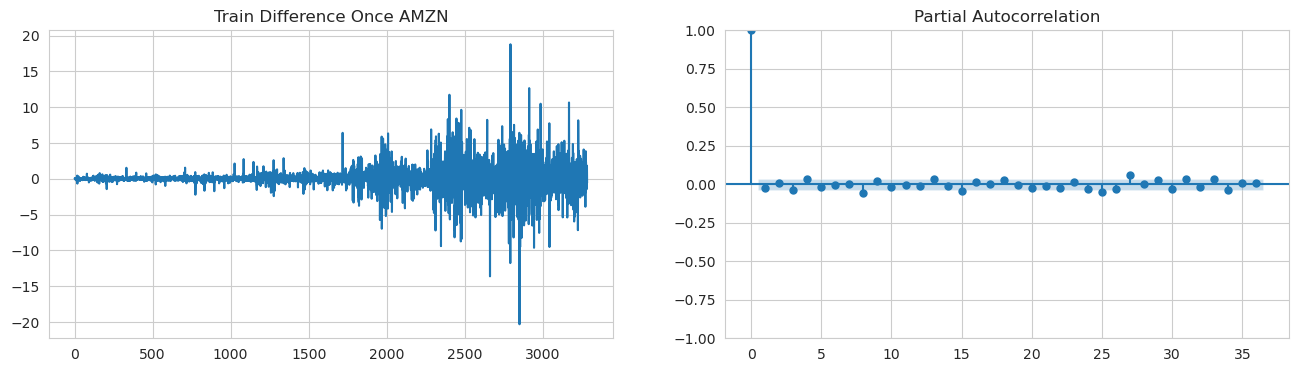

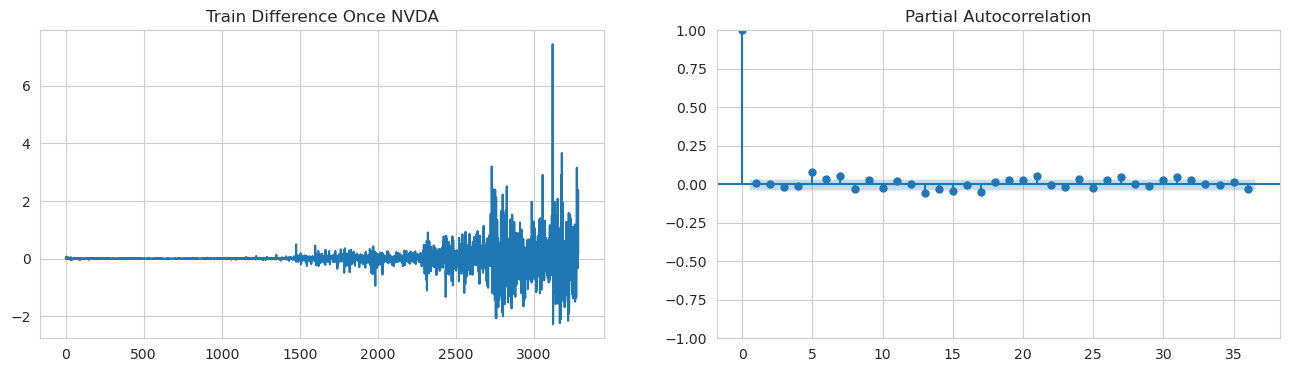

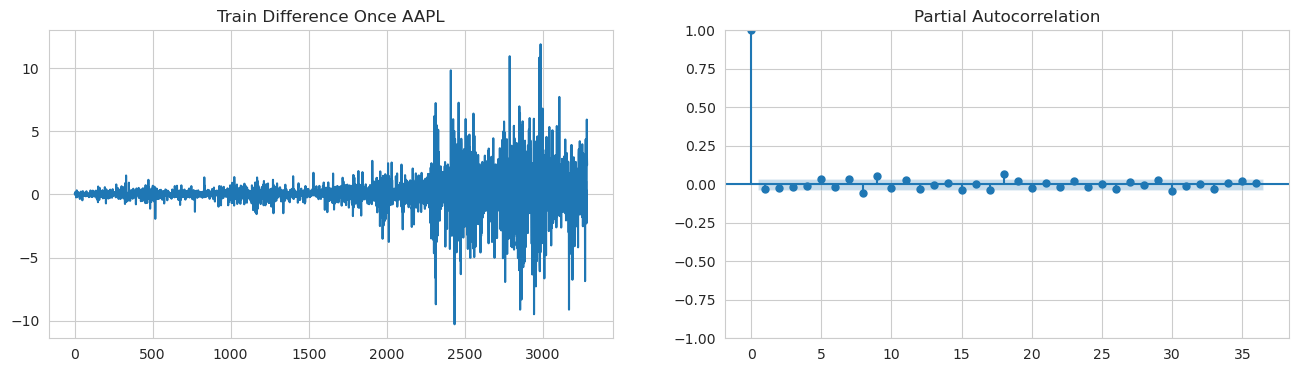

In [93]:
for i in range(len(df_close)):
    diff1 = train[i].Close.diff().dropna() 
    fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16,4))
    ax1.plot(diff1)
    ax1.set_title(f"Train Difference Once {stock_symbols[i]}")
    plot_pacf(diff1, ax=ax2);

In [94]:
arima_order_train = {}
for i in range(len(df)):
    print(f"Stock name: {stock_symbols[i]}")
    arima_order_train[i] = auto_arima(train[i].Close, trace=True).get_params().get("order")
    print(f"Training Set ARIMA Order for {stock_symbols[i]}: {arima_order_train[i]}")

Stock name: GOOG
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10958.508, Time=4.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10965.773, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10963.895, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10963.819, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10967.003, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10957.341, Time=2.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=10965.439, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10955.389, Time=2.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=10957.339, Time=2.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=10965.645, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=10958.601, Time=0.63 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 14.469 seconds
Training Set ARIMA Order for GOOG: (1, 1, 1)
Stock name: MSFT
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)

In [96]:
arima_result_train = {}
for i in range(len(df)):
    model_train = sm.ARIMA(train[i].Close, order=arima_order_train[i])
    arima_result_train[i] = model_train.fit()
    print(f"\n Training Set ARIMA Results for {stock_symbols[i]}:\n {arima_result_train[i].summary()}")


 Training Set ARIMA Results for GOOG:
                                SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3284
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5476.301
Date:                Wed, 13 Nov 2024   AIC                          10958.601
Time:                        23:02:57   BIC                          10976.891
Sample:                             0   HQIC                         10965.150
                               - 3284                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8313      0.046     18.246      0.000       0.742       0.921
ma.L1         -0.8656      0.041    -20.915      0.000      -0.947      -0.784
sigma2      

In [115]:
# step=[len(test[i]) for i in range(len(df))]
step=[30 for i in range(len(df))]
step

[30, 30, 30, 30, 30]

In [117]:
conf_int = {}
fc = {}
lower = {}
upper = {}
for i in range(len(df)):
    conf_int[i] = arima_result_train[i].get_forecast(step[i]).conf_int()
    fc[i] = pd.Series(arima_result_train[i].forecast(step[i]), index = test[i][:step[i]].index)
    lower[i] = pd.Series(conf_int[i]['lower Close'], index = test[i][:step[i]].index)
    upper[i] = pd.Series(conf_int[i]['upper Close'], index = test[i][:step[i]].index)
# print(conf_int['lower Close'])

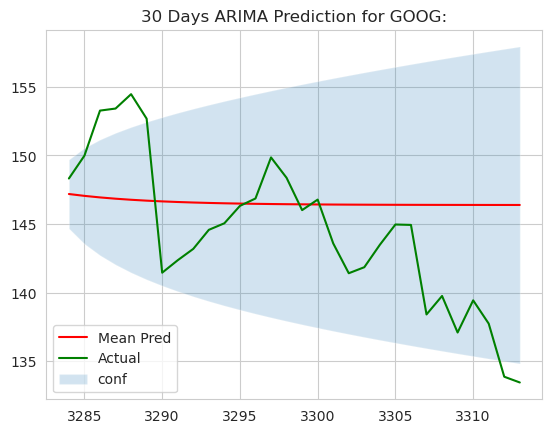

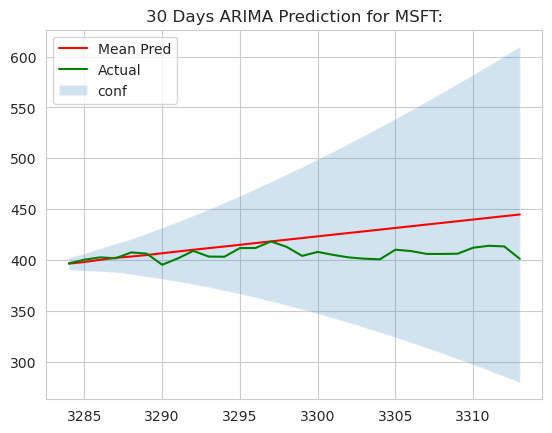

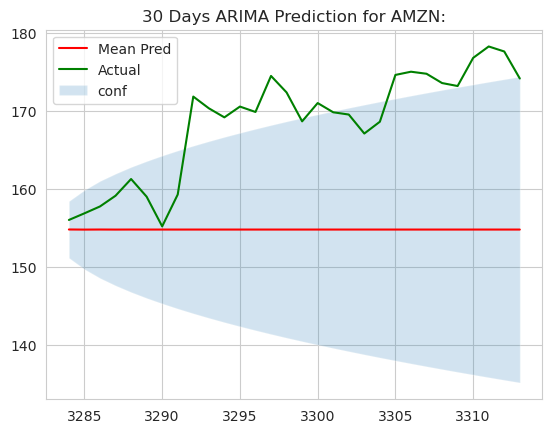

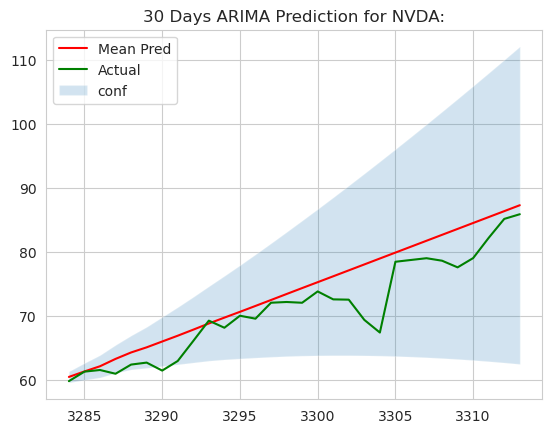

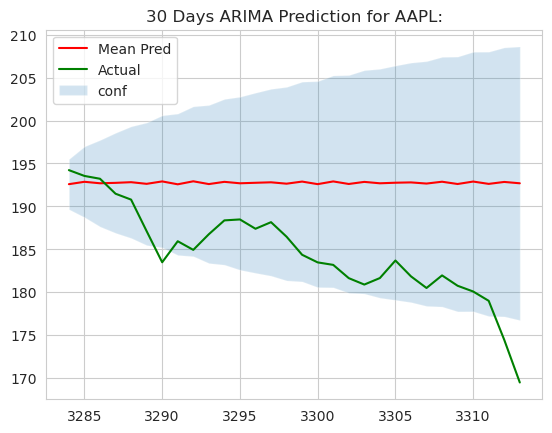

In [118]:
for i in range(len(df)):
    plt.plot(arima_result_train[i].forecast(step[i]), color='r', label='Mean Pred')
    plt.plot(test[i][:step[i]], color='g', label='Actual')
    plt.fill_between(lower[i].index, lower[i], upper[i], alpha = 0.2, label='conf')
    plt.legend()
    plt.title(f"30 Days ARIMA Prediction for {stock_symbols[i]}:")
    plt.show()